In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.listdir()

['category.csv', 'test.csv', 'avito.ipynb', '.ipynb_checkpoints', 'train.csv']

### Взглянем на данные

In [3]:
train = pd.read_csv('train.csv', index_col='item_id')

In [4]:
train.shape

(489517, 4)

In [5]:
train.head(20)

,title,description,price,category_id
item_id,,,,
0,Картина,Гобелен. Размеры 139х84см.,1000.0,19
1,Стулья из прессованной кожи,Продам недорого 4 стула из светлой прессованно...,1250.0,22
2,Домашняя мини баня,"Мини баня МБ-1(мини сауна), предназначена для ...",13000.0,37
3,"Эксклюзивная коллекция книг ""Трансаэро"" + подарок","Продам эксклюзивную коллекцию книг, выпущенную...",4000.0,43
4,Ноутбук aser,Продаётся ноутбук ACER e5-511C2TA. Куплен в ко...,19000.0,1
5,Бас гитара invasion bg110,Состояние хорошее. Имеется теплый чехол .,3999.0,50
6,"Смесь ""Грудничок"" г. Зеленодольск",Смесь молочная адаптированная ультрапастеризов...,15.0,41
7,G-shock,Часы абсолютно новые! с коробкой. Часы Китай...,2500.0,36
8,"Санатории Белоруссии. - ""Лепельский военный""",Санатории Белоруссии! - «Лепельский военный» ...,1090.0,48


In [6]:
train.iloc[7, 0] = 'Gshock'

In [7]:
train.info()    #no nan objects

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489517 entries, 0 to 489516
Data columns (total 4 columns):
title          489517 non-null object
description    489517 non-null object
price          489517 non-null float64
category_id    489517 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 18.7+ MB


### Таргет

In [8]:
categories = pd.read_csv('category.csv', index_col='category_id')

In [9]:
categories.shape

(54, 1)

In [68]:
categories

,name
category_id,
0,Бытовая электроника|Телефоны|iPhone
1,Бытовая электроника|Ноутбуки
2,Бытовая электроника|Телефоны|Samsung
3,Бытовая электроника|Планшеты и электронные кни...
4,"Бытовая электроника|Игры, приставки и программ..."
5,Бытовая электроника|Аудио и видео|Телевизоры и...
6,Бытовая электроника|Телефоны|Другие марки
7,Бытовая электроника|Настольные компьютеры
8,"Бытовая электроника|Игры, приставки и программ..."


Категории имеют иерархичную структуру => есть 2 способа решения задачи:

    1) Построить один классификатор и сразу предсказывать категорию, но тогда теряется структура в данных
    2) Построить множество классификаторов отдельно для каждой категории/подкатегории
Воспользуюсь вторым вариантом

In [11]:
train['category_id'].value_counts()

49    9998
18    9932
29    9904
2     9887
37    9884
23    9804
39    9798
21    9767
45    9755
27    9732
11    9674
44    9668
35    9661
22    9655
47    9638
53    9601
28    9573
32    9451
15    9435
12    9416
50    9379
52    9264
42    9260
36    9232
17    9213
20    9142
43    9065
13    9008
24    8972
26    8948
34    8917
19    8906
41    8879
0     8862
48    8819
10    8769
8     8698
6     8697
4     8616
3     8604
7     8592
51    8584
38    8516
31    8495
16    8405
46    8343
5     8241
33    8234
14    8231
30    8223
25    8106
9     8033
1     8022
40    8009
Name: category_id, dtype: int64

Target распределен примерно одинаково среди всех классов

## Price

In [12]:
train['price'].describe()

count    4.895170e+05
mean     8.795970e+03
std      7.158194e+04
min      1.300000e+01
25%      7.500000e+02
50%      2.400000e+03
75%      7.000000e+03
max      1.000000e+07
Name: price, dtype: float64

Text(0.5, 0, 'Instances')

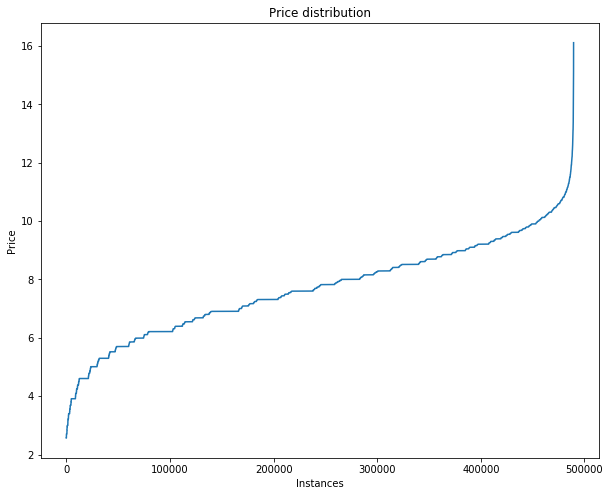

In [13]:
plt.figure(figsize=(10, 8))
plt.plot(train['price'].index, sorted(np.log(train['price'])))
plt.title('Price distribution')
plt.ylabel('Price')
plt.xlabel('Instances')

Добавлю новый признак - количество цифр в числе, так как при последующей нормализации эта информация потеряется

In [14]:
price_digits = train['price'].apply(lambda z: int(np.log10(z))+1)
train = train.assign(price_digits=price_digits)

In [15]:
train.head()

,title,description,price,category_id,price_digits
item_id,,,,,
0,Картина,Гобелен. Размеры 139х84см.,1000.0,19,4
1,Стулья из прессованной кожи,Продам недорого 4 стула из светлой прессованно...,1250.0,22,4
2,Домашняя мини баня,"Мини баня МБ-1(мини сауна), предназначена для ...",13000.0,37,5
3,"Эксклюзивная коллекция книг ""Трансаэро"" + подарок","Продам эксклюзивную коллекцию книг, выпущенную...",4000.0,43,4
4,Ноутбук aser,Продаётся ноутбук ACER e5-511C2TA. Куплен в ко...,19000.0,1,5


## Title  и Description

### Приводим к нижнему регистру

In [16]:
text_cols = ['title', 'description']

In [17]:
for col in text_cols:
    train[col] = train[col].str.lower()

In [18]:
length = 0
for i in train['title']:
    length += len(i)
mean_length = length / train.shape[0]

### Средняя длина Title:

In [19]:
mean_length

25.24790763139993

In [2]:
from nltk.tokenize import word_tokenize

In [21]:
for col in text_cols:
    train[col] = train[col].apply(word_tokenize)

In [22]:
train[text_cols]

,title,description
item_id,,
0,[картина],"[гобелен, ., размеры, 139х84см, .]"
1,"[стулья, из, прессованной, кожи]","[продам, недорого, 4, стула, из, светлой, прес..."
2,"[домашняя, мини, баня]","[мини, баня, мб-1, (, мини, сауна, ), ,, предн..."
3,"[эксклюзивная, коллекция, книг, ``, трансаэро,...","[продам, эксклюзивную, коллекцию, книг, ,, вып..."
4,"[ноутбук, aser]","[продаётся, ноутбук, acer, e5-511c2ta, ., купл..."
5,"[бас, гитара, invasion, bg110]","[состояние, хорошее, ., имеется, теплый, чехол..."
6,"[смесь, ``, грудничок, '', г., зеленодольск]","[смесь, молочная, адаптированная, ультрапастер..."
7,[gshock],"[часы, абсолютно, новые, !, с, коробкой, ., ча..."
8,"[санатории, белоруссии, ., -, ``, лепельский, ...","[санатории, белоруссии, !, -, «, лепельский, в..."


In [23]:
words = 0
for i in train['title']:
    length += len(i)
mean_amount_of_words = length / train.shape[0]

### Среднее количество слов:

In [24]:
mean_amount_of_words

29.409374955313094

### Оставлю только "слова" русского и английского алфавита.

In [25]:
for col in text_cols:
    train[col] = train[col].apply(lambda x: [w for w in x if w.isalpha()])

In [26]:
train.head()

,title,description,price,category_id,price_digits
item_id,,,,,
0,[картина],"[гобелен, размеры]",1000.0,19,4
1,"[стулья, из, прессованной, кожи]","[продам, недорого, стула, из, светлой, прессов...",1250.0,22,4
2,"[домашняя, мини, баня]","[мини, баня, мини, сауна, предназначена, для, ...",13000.0,37,5
3,"[эксклюзивная, коллекция, книг, трансаэро, под...","[продам, эксклюзивную, коллекцию, книг, выпуще...",4000.0,43,4
4,"[ноутбук, aser]","[продаётся, ноутбук, acer, куплен, в, конце, н...",19000.0,1,5


### 20 Самых часто встречающихся слов в Title

In [3]:
from itertools import chain
from collections import Counter

In [28]:
words_count = pd.Series(chain.from_iterable(train['title'])).value_counts()
top_20 = words_count[:20]
top_20

для          37976
продам       29689
с            18001
на           17727
в            16045
и            15095
samsung      13234
sony         11069
iphone       10368
из            8948
новый         7795
платье        7400
galaxy        7395
часы          6923
продаю        6574
xperia        6417
nokia         6031
стол          5566
монитор       5538
телевизор     5136
dtype: int64

#### Примечательно, что большая их часть связана с различными видами электроники

## Лемматизация и стэмминг

#### Сначала применю стэмминг на текстовые данные, затем лемматизацию и сравню качество для обоих методов обработки текстовых данных

In [4]:
from nltk.stem import SnowballStemmer

In [5]:
import nltk
#nltk.download('stopwords')

In [24]:
stemmer = SnowballStemmer('russian')

In [9]:
def stemming(word_list):
    stemmed = [stemmer.stem(x) for x in word_list]
    return stemmed

In [33]:
%%time
stemmed_title = train['title'].apply(lambda word_list: [stemmer.stem(x) for x in word_list])

CPU times: user 50.6 s, sys: 124 ms, total: 50.7 s
Wall time: 50.7 s


In [34]:
%%time
stemmed_description = train['description'].apply(lambda word_list: [stemmer.stem(x) for x in word_list])

CPU times: user 11min 40s, sys: 1.35 s, total: 11min 41s
Wall time: 11min 41s


### Стоп-слова

In [6]:
from nltk.corpus import stopwords

In [7]:
stop_words = set(stopwords.words('russian'))

In [37]:
%%time
#tokenized_title = [word_tokenize(text) for text in stemmed_title]
#tokenized_description = [word_tokenize(text) for text in stemmed_description]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [8]:
def remove_stop_words(sentence):
    clear_sentence = [word for word in sentence if word not in stop_words]
    return ' '.join(clear_sentence)

In [39]:
title_cleared = list(map(remove_stop_words, stemmed_title))
description_cleared = list(map(remove_stop_words, stemmed_description))

In [40]:
train['title'] = title_cleared
train['description'] = description_cleared

In [41]:
train.head()

,title,description,price,category_id,price_digits
item_id,,,,,
0,картин,гобел размер,1000.0,19,4
1,стул прессова кож,прод недор стул светл прессова кож стильн ножк...,1250.0,22,4
2,домашн мин бан,мин бан мин саун предназнач принят теплов проц...,13000.0,37,5
3,эксклюзивн коллекц книг трансаэр подарок,прод эксклюзивн коллекц книг выпущен ограничен...,4000.0,43,4
4,ноутбук aser,прода ноутбук acer купл конц ноябр вообщ польз...,19000.0,1,5


### Построю первый классификатор: логистическую регрессию со стохастическим градиентным спуском.

In [42]:
splitted = categories['name'].apply(lambda category: category.split('|'))
cat_1 = pd.Series([item[0] for item in splitted]).unique()

In [43]:
cat_1

array(['Бытовая электроника', 'Для дома и дачи', 'Личные вещи',
       'Хобби и отдых'], dtype=object)

In [44]:
def create_dict(full_category, category_in_hierarchy):
    for i in full_category:
        if i in category_in_hierarchy:
            return i

In [45]:
cat_1_dict = splitted.apply(create_dict, args=(cat_1,))
cat_1_dict

category_id
0     Бытовая электроника
1     Бытовая электроника
2     Бытовая электроника
3     Бытовая электроника
4     Бытовая электроника
5     Бытовая электроника
6     Бытовая электроника
7     Бытовая электроника
8     Бытовая электроника
9     Бытовая электроника
10    Бытовая электроника
11    Бытовая электроника
12    Бытовая электроника
13    Бытовая электроника
14    Бытовая электроника
15        Для дома и дачи
16        Для дома и дачи
17        Для дома и дачи
18        Для дома и дачи
19        Для дома и дачи
20        Для дома и дачи
21        Для дома и дачи
22        Для дома и дачи
23        Для дома и дачи
24        Для дома и дачи
25        Для дома и дачи
26        Для дома и дачи
27        Для дома и дачи
28        Для дома и дачи
29        Для дома и дачи
30            Личные вещи
31            Личные вещи
32            Личные вещи
33            Личные вещи
34            Личные вещи
35            Личные вещи
36            Личные вещи
37            Личные вещи


In [46]:
train

,title,description,price,category_id,price_digits
item_id,,,,,
0,картин,гобел размер,1000.0,19,4
1,стул прессова кож,прод недор стул светл прессова кож стильн ножк...,1250.0,22,4
2,домашн мин бан,мин бан мин саун предназнач принят теплов проц...,13000.0,37,5
3,эксклюзивн коллекц книг трансаэр подарок,прод эксклюзивн коллекц книг выпущен ограничен...,4000.0,43,4
4,ноутбук aser,прода ноутбук acer купл конц ноябр вообщ польз...,19000.0,1,5
5,бас гитар invasion,состоян хорош имеет тепл чехол,3999.0,50,4
6,сме грудничок зеленодольск,сме молочн адаптирова ультрапастеризова грудни...,15.0,41,2
7,gshock,час абсолютн нов коробк час кита подар нов год...,2500.0,36,4
8,санатор белорусс лепельск воен,санатор белорусс лепельск воен цен человек пак...,1090.0,48,4


In [47]:
#train['category_id'] = target
target = train['category_id']
target_1 = train['category_id'].replace(cat_1_dict)
target_1[:10]

item_id
0        Для дома и дачи
1        Для дома и дачи
2            Личные вещи
3          Хобби и отдых
4    Бытовая электроника
5          Хобби и отдых
6            Личные вещи
7            Личные вещи
8          Хобби и отдых
9        Для дома и дачи
Name: category_id, dtype: object

In [48]:
train.drop('category_id', axis=1, inplace=True)

### Bag-of-words векторы для Title и Tf-Idf векторы для Description

In [49]:
train.head(2)

,title,description,price,price_digits
item_id,,,,
0,картин,гобел размер,1000.0,4
1,стул прессова кож,прод недор стул светл прессова кож стильн ножк...,1250.0,4


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from scipy.sparse import hstack

In [51]:
%%time

kf = KFold(n_splits=5, shuffle=True, random_state=2019)
scores = []

for train_index, test_index in kf.split(train, target):
    
    cnt_vec = CountVectorizer()
    tf_idf = TfidfVectorizer()
    std_scaler = StandardScaler()
    label_bin = LabelBinarizer(sparse_output=True)
    
    title_tr = cnt_vec.fit_transform(train.iloc[train_index, 0])
    description_tr = tf_idf.fit_transform(train.iloc[train_index, 1])
    price_tr = std_scaler.fit_transform(train.iloc[train_index, 2].values.reshape(-1, 1))
    digits_tr = label_bin.fit_transform(train.iloc[train_index, 3])
    
    train_dataset = hstack([title_tr, description_tr, price_tr, digits_tr])
    
    title_te = cnt_vec.transform(train.iloc[test_index, 0])
    description_te = tf_idf.transform(train.iloc[test_index, 1])
    price_te = std_scaler.transform(train.iloc[test_index, 2].values.reshape(-1, 1))
    digits_te = label_bin.transform(train.iloc[test_index, 3])
    
    test_dataset = hstack([title_te, description_te, price_te, digits_te])

    clf = LogisticRegression(random_state=2019)
    clf.fit(train_dataset, target[train_index])
    preds = clf.predict(test_dataset)
    score = accuracy_score(target[test_index], preds)
    scores.append(score)
    print('Accuracy: {}'.format(score))

print('Mean accuracy: {}'.format(np.array(scores).mean()))

/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.8786566432423598


/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.8781867952279784


/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.8788699018416187


/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.8796155378282586


/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.879860678426606
Mean accuracy: 0.8790379113133643
CPU times: user 2h 53min 16s, sys: 7.2 s, total: 2h 53min 23s
Wall time: 1h 27min 22s


In [11]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=2019)

In [59]:
cnt_vec = CountVectorizer()
tf_idf = TfidfVectorizer()
std_scaler = StandardScaler()
label_bin = LabelBinarizer(sparse_output=True)

title_tr = cnt_vec.fit_transform(X_train.iloc[:, 0])
description_tr = tf_idf.fit_transform(X_train.iloc[:, 1])
price_tr = std_scaler.fit_transform(X_train.iloc[:, 2].values.reshape(-1, 1))
digits_tr = label_bin.fit_transform(X_train.iloc[:, 3])

train_dataset = hstack([title_tr, description_tr, price_tr, digits_tr])

title_te = cnt_vec.transform(X_test.iloc[:, 0])
description_te = tf_idf.transform(X_test.iloc[:, 1])
price_te = std_scaler.transform(X_test.iloc[:, 2].values.reshape(-1, 1))
digits_te = label_bin.transform(X_test.iloc[:, 3])

test_dataset = hstack([title_te, description_te, price_te, digits_te])

0.8779212289589802

In [ ]:
clf = LogisticRegression(random_state=2019, solver='liblinear', multi_class='ovr')
clf.fit(train_dataset, y_train)
preds = clf.predict(test_dataset)
accuracy_score(y_test, preds)

### При большом количестве разнообразных тестов я пришел к выводу, что все-таки лучше стоит отбросить информацию о иерархичности категорий и сразу классифицировать все категории одной моделью. Аккуратность на кросс-валидации с 5 фолдами примерно 0.879, а у классификатора, классифирующего только самую первую категорию (классы ниже), имеет аккуратность около 0.961, причем классы эти достаточно разнообразны и их различить между собой будет проще, чем их последующие подкатегории (которых в среднем 2). То есть у таких последовательных классификаторов уже после предсказания категории и одной подкатегории метрика будет меньше, чем у классификатора, предсказывающего сразу все классы. А ведь надо еще глубже классифицировать объявления)). 

### В качестве моделей я использовал логистическую регрессию со стохастическим и обычным градиентым спуском, кнн, свм. Деревья и их энсемблы, к сожалению, не получилось обучить, так как не позволяет железо )). Лучшей в итоге стала Логистическая регрессия.

In [77]:
cat_1

array(['Бытовая электроника', 'Для дома и дачи', 'Личные вещи',
       'Хобби и отдых'], dtype=object)

## Посчитаю аккуратность на каждой ступени иерархии

### Первая ступень, классы:

In [91]:
cat_1

array(['Бытовая электроника', 'Для дома и дачи', 'Личные вещи',
       'Хобби и отдых'], dtype=object)

In [83]:
test_1 = y_test.replace(cat_1_dict)
preds_1 = pd.Series(preds).replace(cat_1_dict)

In [90]:
accuracy_score(test_1, preds_1)

0.9577055074358556

### Вторая ступень, классы:

In [92]:
cat_2 = pd.Series([item[1] for item in splitted]).unique()

In [93]:
cat_2

array(['Телефоны', 'Ноутбуки', 'Планшеты и электронные книги',
       'Игры, приставки и программы', 'Аудио и видео',
       'Настольные компьютеры', 'Товары для компьютера',
       'Ремонт и строительство', 'Мебель и интерьер',
       'Посуда и товары для кухни', 'Растения', 'Бытовая техника',
       'Товары для детей и игрушки', 'Одежда, обувь, аксессуары',
       'Часы и украшения', 'Красота и здоровье', 'Спорт и отдых',
       'Книги и журналы', 'Коллекционирование', 'Билеты и путешествия',
       'Охота и рыбалка', 'Музыкальные инструменты', 'Велосипеды'],
      dtype=object)

In [97]:
cat_2_dict = splitted.apply(create_dict, args=(cat_2,))
cat_2_dict

category_id
0                         Телефоны
1                         Ноутбуки
2                         Телефоны
3     Планшеты и электронные книги
4      Игры, приставки и программы
5                    Аудио и видео
6                         Телефоны
7            Настольные компьютеры
8      Игры, приставки и программы
9                         Телефоны
10                        Телефоны
11                        Телефоны
12                   Аудио и видео
13           Товары для компьютера
14           Товары для компьютера
15          Ремонт и строительство
16               Мебель и интерьер
17          Ремонт и строительство
18               Мебель и интерьер
19               Мебель и интерьер
20       Посуда и товары для кухни
21          Ремонт и строительство
22               Мебель и интерьер
23               Мебель и интерьер
24                        Растения
25          Ремонт и строительство
26                 Бытовая техника
27               Мебель и интерьер
28      

In [98]:
test_2 = y_test.replace(cat_2_dict)
preds_2 = pd.Series(preds).replace(cat_2_dict)
accuracy_score(test_2, preds_2)

0.9361823827422782

### Третья ступень:

In [192]:
cat_3 = []
for item in splitted:
    if len(item) >= 3:
        cat_3.append(item[2])
cat_3_dict = splitted.apply(create_dict, args=(cat_3,))
preds_3 = preds[y_test.isin(cat_3_dict[cat_3_dict.notna()].index).reset_index(drop=True)]
test_3 = y_test[y_test.isin(cat_3_dict[cat_3_dict.notna()].index)]
accuracy_score(test_3, preds_3)

0.8737282905756855

### Последняя четвертая ступень:

In [193]:
cat_4 = []
for item in splitted:
    if len(item) >= 4:
        cat_4.append(item[3])
cat_4_dict = splitted.apply(create_dict, args=(cat_4,))
preds_4 = preds[y_test.isin(cat_4_dict[cat_4_dict.notna()].index).reset_index(drop=True)]
test_4 = y_test[y_test.isin(cat_4_dict[cat_4_dict.notna()].index)]
accuracy_score(test_4, preds_4)

0.7952236213634389

## Обучаю основную модель на всех данных и делаю предсказания для тестовой выборки

In [17]:
train = pd.read_csv('train.csv', index_col='item_id')
test = pd.read_csv('test.csv', index_col='item_id')

In [18]:
target = train['category_id']
train = train.drop('category_id', axis=1)

In [19]:
train.head()

,title,description,price
item_id,,,
0,Картина,Гобелен. Размеры 139х84см.,1000.0
1,Стулья из прессованной кожи,Продам недорого 4 стула из светлой прессованно...,1250.0
2,Домашняя мини баня,"Мини баня МБ-1(мини сауна), предназначена для ...",13000.0
3,"Эксклюзивная коллекция книг ""Трансаэро"" + подарок","Продам эксклюзивную коллекцию книг, выпущенную...",4000.0
4,Ноутбук aser,Продаётся ноутбук ACER e5-511C2TA. Куплен в ко...,19000.0


In [20]:
test.head()

,title,description,price
item_id,,,
489517,Стоик журнальный сталь,продам журнальный столик изготавливаю столы из...,10000.0
489518,iPhone 5 64Gb,"Телефон в хорошем состоянии. Комплект, гаранти...",12500.0
489519,Утеплитель,ТЕПЛОПЕЛЕН-ЛИДЕР ТЕПЛА!!! Толщина утеплителя :...,250.0
489520,Пальто демисезонное,Продам пальто женское (букле) в отличном состо...,1700.0
489521,Samsung syncmaster T200N,"Условно рабочий, проблема в панели настройки м...",1000.0


In [22]:
def prepare_dataset(df):
    price_digits = df['price'].apply(lambda z: int(np.log10(z))+1)
    df = df.assign(price_digits=price_digits)
    text_cols = ['title', 'description']
    for col in text_cols:
        df[col] = df[col].str.lower()
        df[col] = df[col].apply(word_tokenize)
        df[col] = df[col].apply(lambda x: [w for w in x if w.isalpha()])
    stemmed_title = df['title'].apply(lambda word_list: [stemmer.stem(x) for x in word_list])
    stemmed_description = df['description'].apply(lambda word_list: [stemmer.stem(x) for x in word_list])
    title_cleared = list(map(remove_stop_words, stemmed_title))
    description_cleared = list(map(remove_stop_words, stemmed_description))
    df['title'] = title_cleared
    df['description'] = description_cleared
    return df

In [25]:
%%time
train_prepared = prepare_dataset(train)

CPU times: user 15min 37s, sys: 1.67 s, total: 15min 38s
Wall time: 15min 39s


In [28]:
%%time
test_prepared = prepare_dataset(test)

CPU times: user 7min 48s, sys: 35.8 ms, total: 7min 48s
Wall time: 7min 49s


In [33]:
cnt_vec = CountVectorizer()
tf_idf = TfidfVectorizer()
std_scaler = StandardScaler()
label_bin = LabelBinarizer(sparse_output=True)

In [34]:
title_tr = cnt_vec.fit_transform(train_prepared.iloc[:, 0])
description_tr = tf_idf.fit_transform(train_prepared.iloc[:, 1])
price_tr = std_scaler.fit_transform(train_prepared.iloc[:, 2].values.reshape(-1, 1))
digits_tr = label_bin.fit_transform(train_prepared.iloc[:, 3])

train_dataset = hstack([title_tr, description_tr, price_tr, digits_tr])

In [35]:
title_te = cnt_vec.transform(test_prepared.iloc[:, 0])
description_te = tf_idf.transform(test_prepared.iloc[:, 1])
price_te = std_scaler.transform(test_prepared.iloc[:, 2].values.reshape(-1, 1))
digits_te = label_bin.transform(test_prepared.iloc[:, 3])

test_dataset = hstack([title_te, description_te, price_te, digits_te])

In [39]:
%%time
clf = LogisticRegression(random_state=2019, solver='liblinear', multi_class='ovr', max_iter=150)
clf.fit(train_dataset, target)
preds = clf.predict(test_dataset)

CPU times: user 51min 25s, sys: 1.16 s, total: 51min 26s
Wall time: 25min 44s


In [54]:
preds.shape

(243166,)

In [43]:
test.shape

(243166, 3)

In [53]:
test.index.shape

(243166,)

In [59]:
pd.DataFrame({'item_id':test.index, 'category_id':preds}).to_csv('submission.csv', index=False)

In [58]:
os.listdir()

['category.csv',
 'test.csv',
 'avito.ipynb',
 '.ipynb_checkpoints',
 'train.csv',
 'submission.csv']